11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8561 - loss: 0.4866
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9552 - loss: 0.1489
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9678 - loss: 0.1063
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9727 - loss: 0.0898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9779 - loss: 0.0701
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9716 - loss: 0.0896
Test accuracy: 0.9761999845504761
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


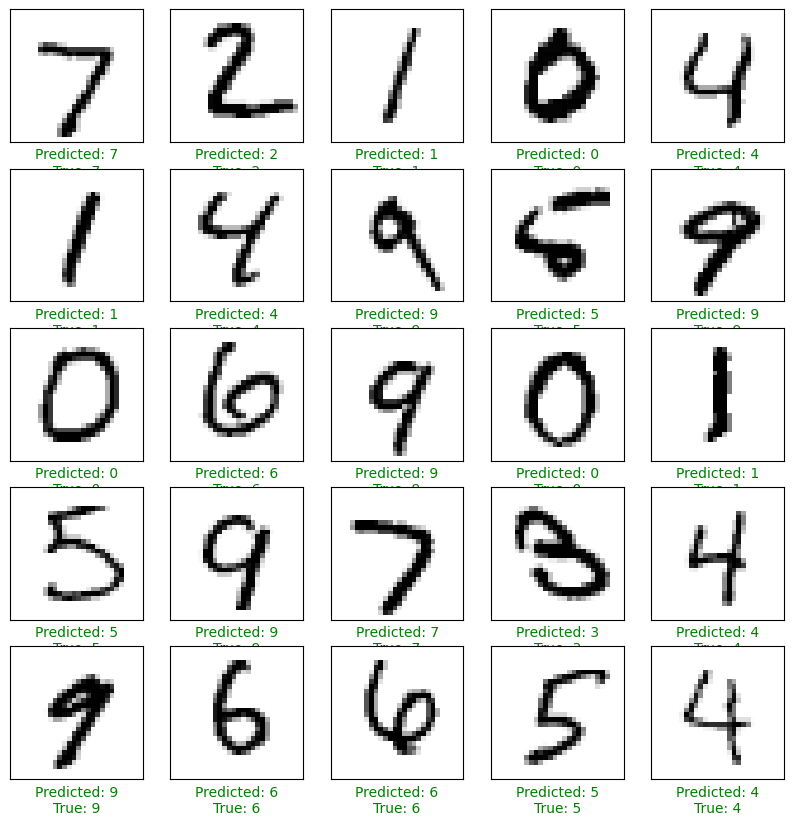

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dropout(0.2), # Dropout layer to reduce overfitting
 keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
 plt.subplot(5, 5, i + 1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(test_images[i], cmap=plt.cm.binary)
 predicted_label = predictions[i].argmax()
 true_label = test_labels[i]
 if predicted_label == true_label:
  color = 'green'
 else:
  color = 'red'
 plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
plt.show()